<a href="https://colab.research.google.com/github/kur1an/Human-Facial-Recognition-System/blob/main/Human_Facial_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
image_size = (256, 256)
batch_size = 3

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/hackthon",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/hackthon",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 853 files belonging to 2 classes.
Using 683 files for training.
Found 853 files belonging to 2 classes.
Using 170 files for validation.


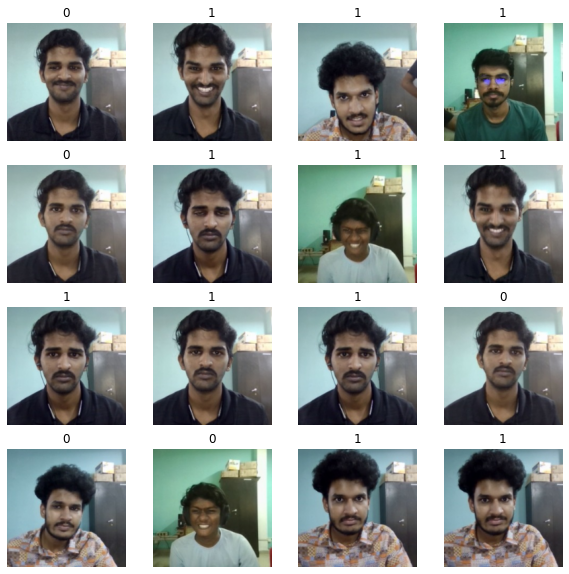

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4,4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

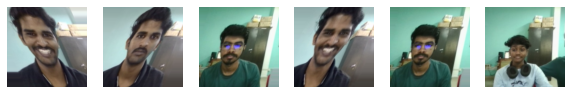

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)

    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=6, figsize=(10,10))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()

image =train_ds
data_generator = ImageDataGenerator(shear_range=45.0)
plot(data_generator)



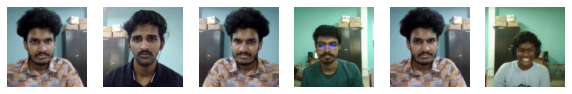

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True)
plot(data_generator)

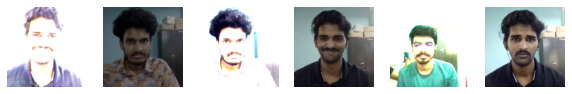

In [ ]:
data_generator = ImageDataGenerator(brightness_range=(5.0, 0.50))
plot(data_generator)

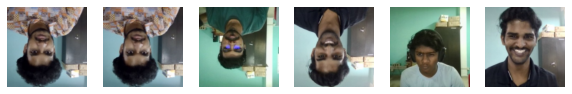

In [ ]:
data_generator = ImageDataGenerator(vertical_flip=True)
plot(data_generator)

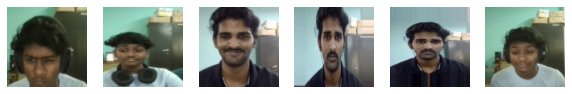

In [ ]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5])
plot(data_generator)

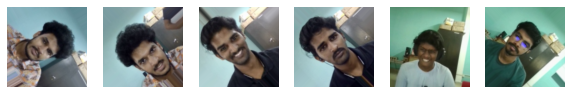

In [ ]:
data_generator = ImageDataGenerator(rotation_range=90)
plot(data_generator)

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

data_path = '/content/drive/MyDrive/hackthon'

transform_img_normal = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5125,0.4667,0.4110],
                         std= [0.2621,0.2501,0.2453])
])

image_data_normal = torchvision.datasets.ImageFolder(
  root='/content/drive/MyDrive/hackthon',
  transform=transform_img_normal
)
display(image_data_normal)

Dataset ImageFolder
    Number of datapoints: 853
    Root location: /content/drive/MyDrive/hackthon
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(256, 256))
               ToTensor()
               Normalize(mean=[0.5125, 0.4667, 0.411], std=[0.2621, 0.2501, 0.2453])
           )

In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     2

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


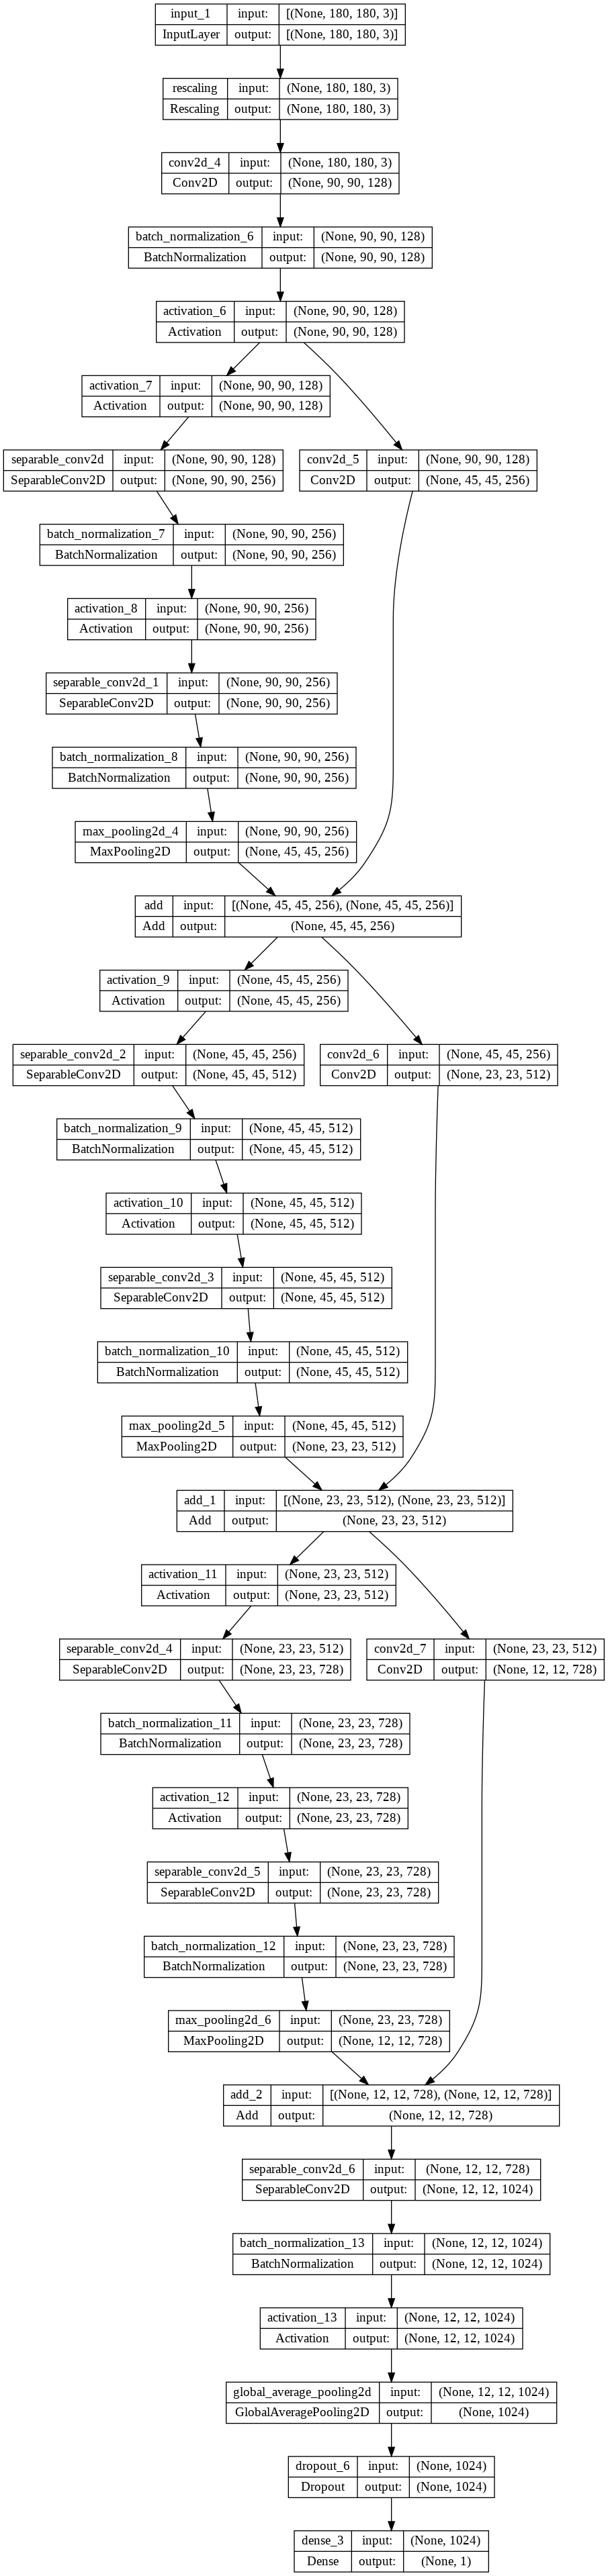

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
11/11 [==============================] - 413s 37s/step - loss: 0.4736 - accuracy: 0.7994 - val_loss: 0.6589 - val_accuracy: 0.8471
Epoch 2/25
11/11 [==============================] - 389s 35s/step - loss: 0.4375 - accuracy: 0.8272 - val_loss: 0.6894 - val_accuracy: 0.8471
Epoch 3/25
11/11 [==============================] - 385s 35s/step - loss: 0.3278 - accuracy: 0.8726 - val_loss: 0.7436 - val_accuracy: 0.1529
Epoch 4/25
11/11 [==============================] - 385s 35s/step - loss: 0.1884 - accuracy: 0.9312 - val_loss: 0.7974 - val_accuracy: 0.1529
Epoch 5/25
11/11 [==============================] - 390s 36s/step - loss: 0.1234 - accuracy: 0.9561 - val_loss: 0.9004 - val_accuracy: 0.1529
Epoch 6/25
11/11 [==============================] - 392s 36s/step - loss: 0.1707 - accuracy: 0.9341 - val_loss: 0.9751 - val_accuracy: 0.1529
Epoch 7/25
11/11 [==============================] - 390s 35s/step - loss: 0.1039 - accuracy: 0.9575 - val_loss: 1.0706 - val_accuracy: 0.1529
Epoch 

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/hackthon/CALM/116.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is{100 * (6 - score):.2f}% Sarcasm, {100 * (5 - score):.2f}% Sad, {100 * (4 - score):.2f}% Laugh,{100 * (3 - score):.2f}% Happy,{100 * (2 - score):.2f}% Disgust, {100 * (1 - score):.2f}% Calm and {100 * score:.2f}% Angry.")
print(score)

1/1 [==============================] - 0s 18ms/step
This image is550.05% Sarcasm, 450.05% Sad, 350.05% Laugh,250.05% Happy,150.05% Disgust, 50.05% Calm and 49.95% Angry.
0.4994710385799408
